In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def loadBinData( img_rows, img_cols ,num_classes, f_trn_x , f_trn_y , f_tst_x , f_tst_y ):
    print('Загрузка данных из двоичных файлов...')
    with open(f_trn_x) as read_binary:
        x_trn = np.fromfile(read_binary, dtype = np.uint8)
    with open(f_trn_y) as read_binary:
        y_trn = np.fromfile(read_binary, dtype = np.uint8)
    with open(f_tst_x) as read_binary:
        x_tst = np.fromfile(read_binary, dtype = np.uint8)
    with open(f_tst_y) as read_binary:
        y_tst = np.fromfile(read_binary, dtype = np.uint8)
    # Преобразование целочисленных данных в float32 и нормализация; данные лежат в диапазоне [0.0, 1.0]
    x_trn = np.array(x_trn, dtype = 'float32') / 255
    x_tst = np.array(x_tst, dtype = 'float32') / 255
    
    x_trn = x_trn.reshape((-1, img_rows * img_cols))
    x_tst = x_tst.reshape((-1, img_rows * img_cols))
    
    return x_trn, y_trn, x_tst, y_tst

def show_x(x, y, img_rows, img_cols, N):
    n = int(np.sqrt(N))
    for i, j  in enumerate(np.random.randint(len(x), size = n*n)):
        plt.subplot(n, n, i + 1)
        img = x[j]
        plt.imshow(img, cmap = 'gray')
        plt.title(y[j])
        plt.axis('off')
    plt.subplots_adjust(hspace = 0.5)
    plt.show()

In [3]:
num_classes = 10
img_rows = img_cols = 28
x_trn, y_trn, x_tst, y_tst = loadBinData( img_rows, img_cols , num_classes
                                          ,"images_trn.bin", "labels_trn.bin", "images_tst.bin" , "labels_tst.bin"  )

Загрузка данных из двоичных файлов...


In [4]:
x_trn = x_trn.reshape((60000 ,img_rows , img_cols))
x_tst = x_tst.reshape(( 10000,img_rows , img_cols))

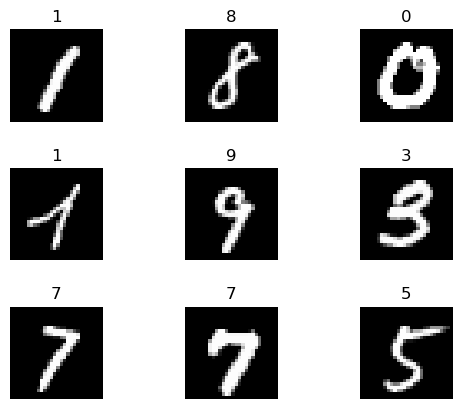

In [5]:
show_x(x_trn, y_trn, img_rows, img_cols, 10)

In [6]:
y_trnc = tf.keras.utils.to_categorical(y_trn, num_classes)#массив, колво классов    
y_tstc = tf.keras.utils.to_categorical(y_tst, num_classes)#массив, колво классов

In [7]:
from sklearn.decomposition import PCA
pca = PCA(100)
conv_xtrn = pca.fit_transform(x_trn.reshape(60000, 784))
conv_xtst = pca.transform(x_tst.reshape(10000, 784))

In [8]:
import keras # Создание модели нейронной сети
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization

inp = Input(shape = (100))
x = Dense(units = 64, activation = 'relu')(inp)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(units = 32, activation = 'relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(units = 16, activation = 'relu')(x) 
output = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = inp, outputs = output)
model.summary() #показать мдель
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy']) 
history = model.fit(conv_xtrn, y_trnc, batch_size = 128, epochs = 10,
                    verbose = 1, validation_data = (conv_xtst, y_tstc))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                             

In [10]:
from sklearn.metrics import classification_report
y_pred = model.predict(conv_xtst)
y_pred = np.argmax(y_pred, axis=-1)
print(classification_report(y_tst, y_pred))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.95      0.91      0.93       892
           6       0.94      0.98      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.94      0.95       974
           9       0.96      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(conv_xtrn, y_trn)
print(classification_report(y_tst, tree.predict(conv_xtst)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       980
           1       0.97      0.93      0.95      1135
           2       0.83      0.73      0.78      1032
           3       0.78      0.78      0.78      1010
           4       0.80      0.77      0.78       982
           5       0.70      0.67      0.69       892
           6       0.87      0.84      0.86       958
           7       0.88      0.83      0.85      1028
           8       0.59      0.79      0.67       974
           9       0.73      0.78      0.75      1009

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



# Я не смог ничего загрузить на каггл из-за ограничений по российским аккаунтам, поэтому вывел все метрики здесь.